In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
x = [(1,2),(2,1),(2,3),(4,1),(1,3),(2,4),(4,3),(3,3),(3,2),(10,12),(12,11),(12,13),(14,11),
(11,13),(12,14),(14,13),(13,13),(13,12),(31,32),(32,31),(32,33),
(34,31),(31,33),(32,34),(34,33),(33,33),(33,32)]

In [3]:
# Calculate Distance between Two Data Points.
def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5

In [4]:
# Calculate single_linkage Distance between Two Clusters.
def single_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(min(d))

# Calculate complete_linkage Distance between Two Clusters.
def complete_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(max(d))

# Calculate average_linkage Distance between Two Clusters.
def average_linkage(cluster1,cluster2):
    d = []
    for i in cluster1:
        for j in cluster2:
            d.append(dist(i,j))
    return(sum(d)/len(d))

In [5]:
# Finding the Positions of the two closest clusters of a Cluster-Set.
# Here we calculate the distances of all possible points one by one and update he minimum distance accordingly.
# This is same as calculatig the wole distance matrix first and finding the minimum distance.

def pos_closest (clusters, linkage):
    # initialize min distance at positioon 1,0
    min_dist = linkage(clusters[1],clusters[0])
    min_pos = [1,0]
    # now calcualte distance of all positions i,j i<j
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            if j<i:
                # if pos i,j has less distance than previous
                if linkage(clusters[i],clusters[j]) <= min_dist:
                    # Set minimum distance at i,j
                    min_dist = linkage(clusters[i],clusters[j])
                    # update min_pos
                    min_pos = [i,j]
    return min_pos

In [6]:
# Hierarchical Clustering Algorithm.
# Instead of returning the whole dendogram, here I'm tryng to return the clusters for a specific No of Clusters.
# Hierarchical Clustering(data_set, no of cluster, linkage type)


def hiar(x,n_cluster,linkage):
    # set iteration at 0
    iter = 0
    # at iteration 0 the no of cluster is same as no of data points in data set, and each data set is an individual cluster.
    clusters = [ [i]  for i in x]
    # now running the algo in loop untill no of clusters reduces to n_cluster
    # in each iteration no of clusters decreases by 1
    while iter < len(x)-n_cluster:
        # Find the Positions of the two closest clusters in the previous Cluster-Set.
        pos = pos_closest (clusters,linkage)
        # initialize the new cluster set
        new_clusters = []
        # append all the clusters except the min distance clusters in the new cluster set.
        for i in range(len(clusters)):
            if i not in pos:
                new_clusters.append(clusters[i])
        # now concatenate the min distance clusters into a single cluster and append to new cluster set.
        new_clusters.append(clusters[pos[0]]+clusters[pos[1]])
        # set the new cluster as the old one
        clusters = new_clusters           
        # and update the iter value
        iter = iter + 1
    # return the newest cluster which contains exactly n_cluster cluster sets.
    return clusters

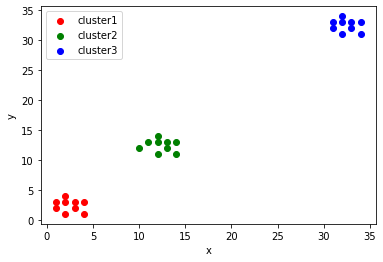

In [7]:
# applying Hierarchical Clustering Algorithm with single_linkage on IRIS Dataset.

z1 = hiar(x,3,single_linkage)
labels=['cluster1','cluster2','cluster3','cluster4']
color=['red','green','blue','cyan']
i = 0
for v in z1:
    plt.scatter(*zip(*v),c=color[i],label=labels[i])
    i = i+1
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

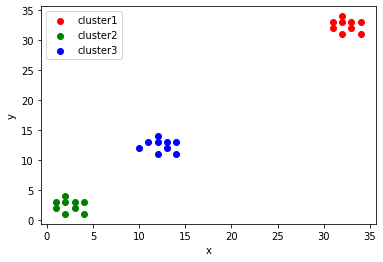

In [8]:
# applying Hierarchical Clustering Algorithm with complete_linkage on IRIS Dataset.

z2 = hiar(x,3,complete_linkage)
labels=['cluster1','cluster2','cluster3','cluster4']
color=['red','green','blue','cyan']
i = 0
for v in z2:
    plt.scatter(*zip(*v),c=color[i],label=labels[i])
    i = i+1
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

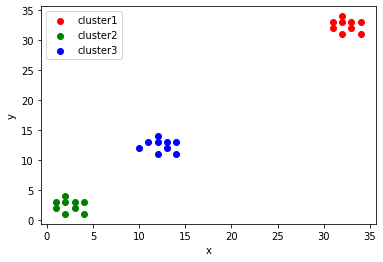

In [9]:
# applying Hierarchical Clustering Algorithm with average_linkage on IRIS Dataset.

z3 = hiar(x,3,average_linkage)
labels=['cluster1','cluster2','cluster3','cluster4']
color=['red','green','blue','cyan']
i = 0
for v in z3:
    plt.scatter(*zip(*v),c=color[i],label=labels[i])
    i = i+1
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()